# Predict whether News is Fake or not

## Develop a Machine Learning Model that can predict whether particular news is fake or not by applying several NLP (Natural Language Processing) Techniques..

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("/Users/shanajames/Downloads/work/repo_2/train.csv")

In [3]:
df.head()
df.shape

(20800, 5)

In [4]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.isnull().sum()
df.shape

(18285, 5)

In [7]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [8]:
df['label'].value_counts()

0    10361
1     7924
Name: label, dtype: int64

### to check imbalance in data

In [9]:
import seaborn as sns

In [10]:
def create_distribution(feature):
    return sns.countplot(df[feature])

In [11]:
df.dtypes
df['label']=df['label'].astype(str)

In [12]:
df.dtypes

id         int64
title     object
author    object
text      object
label     object
dtype: object

/Users/shanajames/Documents/anaconda3/envs/TensorFlow2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


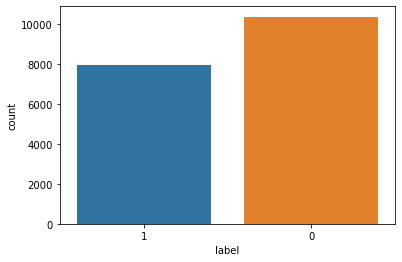

In [13]:
create_distribution('label')

In [14]:
 df.head(20)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [15]:
# some missing datas are found,look at the index ,so we need to reset the index
message=df.copy()

In [16]:
message.reset_index(inplace=True)
message.head(20)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [17]:
 
message.drop(columns='index',inplace=True)

In [18]:
message.head(20)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


## Pre process title feature

In [19]:
message.head()
m=message['title'][0]

In [20]:
# to remove the special character 
import re

In [21]:
m=re.sub('[^a-zA-z]',' ',m)


In [22]:
m=m.lower()

In [23]:
#to convert this statement to numbers we have to use NLP---vector representaion

In [24]:
list=m.split(' ')

In [25]:
list

['house',
 'dem',
 'aide',
 '',
 'we',
 'didn',
 't',
 'even',
 'see',
 'comey',
 's',
 'letter',
 'until',
 'jason',
 'chaffetz',
 'tweeted',
 'it']

In [26]:
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

In [27]:
ps=PorterStemmer()

In [28]:
review=[ps.stem(word) for word in list if word not in set(stopwords.words('english'))]

In [29]:
' '.join(review)

'hous dem aid  even see comey letter jason chaffetz tweet'

In [54]:
corpus=[]
sentences=[]
for i in range(0,len(message)):
    review=re.sub('[^a-zA-Z]',' ', message['title'][i])
    review=review.lower()
    list=review.split()
    review=[ps.stem(word) for word in list if word not in set(stopwords.words('english'))]
    sentences=' '.join(review)
    corpus.append(sentences)

In [56]:
corpus[0]
len(corpus)
# corpus

18285

## Apply bag of words on data

In [57]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=5000,ngram_range=(1,3))

In [58]:
X=cv.fit_transform(corpus).toarray()

In [59]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## get top 20 features

In [60]:
cv.get_feature_names()[:20]

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'abstain',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest']

In [61]:
y=message['label']

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.25,random_state=42)

In [64]:
X_test.shape

(4572, 5000)

## prediction with data

In [65]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()


In [66]:
classifier.fit(X_train,y_train)

MultinomialNB()

In [68]:
pred=classifier.predict(X_test)

In [69]:
from sklearn import metrics
metrics.accuracy_score(y_test,pred)

0.8904199475065617

In [105]:
cm=metrics.confusion_matrix(y_test,pred)
cm

array([[2301,  299],
       [ 202, 1770]])

In [87]:
import matplotlib.pyplot as plt
import numpy as np

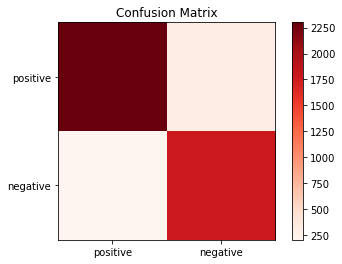

In [106]:
def plot_cm(cm):
    plt.imshow(cm,interpolation='nearest',cmap=plt.cm.Reds)
    plt.colorbar()
    plt.title('Confusion Matrix')
    labels=["positive","negative"]
    tick_marks=np.arange(len(labels))
    plt.xticks(tick_marks,labels)
    plt.yticks(tick_marks,labels)
plot_cm(cm)

## applying other models

In [94]:
from sklearn.linear_model import PassiveAggressiveClassifier


In [97]:
linear_clf=PassiveAggressiveClassifier()

In [98]:
linear_clf.fit(X_train,y_train)

PassiveAggressiveClassifier()

In [99]:
predictions=linear_clf.predict(X_test)

In [100]:
metrics.accuracy_score(y_test,predictions)

0.910761154855643

In [102]:
cm1=metrics.confusion_matrix(y_test,predictions)
cm1

array([[2360,  240],
       [ 168, 1804]])

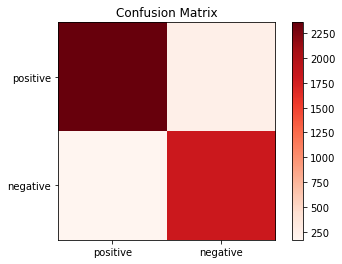

In [103]:
plot_cm(cm1)

## Which are most fake words in real world

In [112]:
feature_names=cv.get_feature_names()

In [111]:
classifier.coef_

array([[ -8.86060051,  -8.60928608,  -9.19707274, ..., -10.80651066,
         -8.72706912,  -9.4202163 ]])

In [117]:
sorted(zip(classifier.coef_[0],feature_names),reverse=True)[:20]

[(-3.9648951809317863, 'trump'),
 (-4.272721819476034, 'hillari'),
 (-4.368759007672977, 'clinton'),
 (-4.861090048802803, 'elect'),
 (-5.219261999009128, 'new'),
 (-5.230561554263062, 'comment'),
 (-5.269176390390841, 'video'),
 (-5.355472203843678, 'war'),
 (-5.372788653855138, 'hillari clinton'),
 (-5.394864605554338, 'us'),
 (-5.412883111057016, 'fbi'),
 (-5.483500678270969, 'vote'),
 (-5.483500678270969, 'email'),
 (-5.559486585248892, 'obama'),
 (-5.570068694579429, 'world'),
 (-5.718914322176994, 'donald'),
 (-5.743915624382411, 'donald trump'),
 (-5.8229040357010415, 'russia'),
 (-5.864868234800074, 'presid'),
 (-5.872036724278686, 'america')]